# Expanding a Square Wave as a Fourier Series

In this notebook I will be approximating  a Square Wave using a Fourier Series, with increasing number of terms included. The complete Fourier series for an infinite number of terms for a square wave is given by:

$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right)$$

where the period of the function is $2L$ [1]

The following code will instead use the following approximation of this Fourier Series :
$$f_\text{square}(x) \approx \frac{4}{\pi} \sum_{n = 1, 3, 5,\ldots}^{n_{max}} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right)$$
This formula is used in the fourier sum function.
<div class="alert alert-success">
<h2> The task: </h2>
<br>
This is a template for the module 7 Fourier Square Wave task. Your job is to fill in the blanks in the code and add text cells where needed. 
<br>
All the instructions for the task are in green text cells like this one. You can keep these cells in your submitted notebook if you want, but they will be ignored by the markers.
<br>
You will be graded on your completed code, and the text cells that you add yourself. Some template text cells are already added, but feel free to add more.
</div>

<div class="alert alert-success">
Replace the title/header of this notebook with your own title, and include a suitable introduction. (You can leave this until the end, but don't forget!)
<div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# The line below changes the default figure size. 
# You may want to edit it to taste or comment it out depending on the size of your screen.
# Don't make the figure so large that you also need to adjust the text size though!
# The default proportions are there for a reason.
plt.rcParams['figure.figsize'] = 12, 6

<div class="alert alert-success">
The code cell below defines our initial data. A value for $L$, the half-period of the function, has already been set. Add a line that will create an array, named <tt>x</tt>, of values to use for the x-values for the plot from $-10$ to $+10$, with an appropriate number of points to result in a smooth function on the plot. (You can come back and adjust this later).
<div>


In [2]:
### Set up initial data
L = 5.     # period of the function is [−L,L]
##### STUDENT COMPLETED LINE #####
#create an array from -10 to 10
x = np.linspace(-10,10, 1000)
###################################

<div class="alert alert-success">
The code cell below contains the start of a function that needs to calculate the Fourier series for a square wave, i.e. it codes the mathematical function
$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right) \qquad \qquad (1)$$ 
for all $n$ up to and including $n = $ <tt>n_max</tt> (as we will need to truncate our series at some finite point rather than continuing all the way to $n = \infty$). The docstring has already been written for you.

<ul>
<li>
Complete the function to calculate the Fourier series including the terms for all values of $n$ up to <tt>n_max</tt> specified in the function input. </li>
<li> <b>Don't change any of the variable names or the docstring. </b>Follow the specification given. </li>
<li>Use appropriate code comments to explain how your function works.</li>
</ul>

<b> Note:</b> Here the variable <tt>L</tt> will act as a _global_ variable. It is defined in the cell above, and when you reference <tt>L</tt> in your function it will use that value of <tt>L</tt>, without having to explicitly pass it to the function. In other words, you don't need to redefine <tt>L</tt> within your function.

<b> HINTS:</b> You will need to use a loop, as you did in the series summation task in module 6. Think carefully about the differences and similarities between that summation and this one. In particular:
<ul>
<li>What are the start and end points of the summation?</li>
<li>Are we summing over all values of n? How will you deal with this?</li>
<li>Note that we're going to be calculating this for an array of x-values. However, as we saw in the Legendre polynomial example, this doesn't make any difference to the way the function is coded: it will automatically work either for a single x-value or an array.</li>
</ul>

<div>

In [3]:
def fourier_sum(x,n_max):
    '''Creates the Fourier series for square wave.
    Inputs:
    x:       array of x-values or single x-value
    n_max:   maximum value of n in summation from eqn(1) above
    Depends on:
    L:       global variable determining period of square wave
    Returns:
    fourier: array of y-values or single y-value for Fourier square wave
    
    '''
    #### STUDENT COMPLETED CELL ####
    # Write code here to satisfy the specification given 
    # in the docstring.
    
    #setup initial parameter
    total = 0
    #loop n from 1 and step of 2 up to n_max
    for n in range(1, n_max+1, 2):
        total += (1/n)*np.sin(n*np.pi*x/L)
    #multiply to make amplitude 1
    sumValue = total * (4/np.pi)
    #return final value
    return sumValue   

    ################################

<div class="alert alert-success">
The code cell below will allow you to check that your <tt>fourier_sum</tt> function is working correctly. Does it generate the correct output for the given inputs? You should debug your function before proceeding. However, if you can't find the source of any problem it may be worth also writing the code that will plot the Fourier series (below), in case looking at a plot of the function over the whole x-range reveals the source of the problem.
</div>

In [4]:
# Check all is well before proceeding!
print(f"At x = 5 and n_max = 1, function returns {fourier_sum(5,1)}.")
print("  Should be zero.")
print(f"At x = -2 and n_max = 5, function returns {fourier_sum(-2,5)}.")
print("  Should be -0.96145....")

At x = 5 and n_max = 1, function returns 1.5592687330077502e-16.
  Should be zero.
At x = -2 and n_max = 5, function returns -0.9614589568147475.
  Should be -0.96145....


<div class="alert alert-success">
Now you should use your function to plot the Fourier series for different numbers of terms, investigate its behaviour, and write some conclusions. You may want to go further, but you should at least look at, and comment on what happens
<ul>
    <li>as <tt>n_max</tt> increases;</li>
    <li>when <tt>n_max</tt> changes between odd and even values, e.g. from 1 to 2, 2 to 3, and 3 to 4;</li>
    <li>when <tt>n_max</tt> becomes very large, say over 100;</li>
    <li>in regions where the function is changing rapidly.</li>
</ul>
You should think about how best to present your results, e.g. whether to plot different results on the same axes or separate ones. You can add further code and text cells as appropriate.
<div>

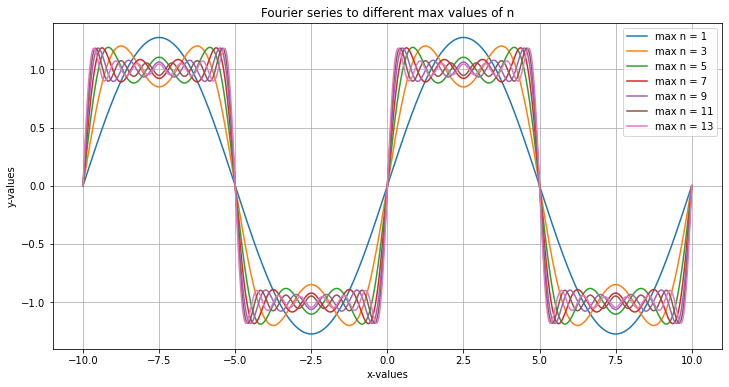

In [5]:
#### STUDENT COMPLETED CELL ##########
# Add your code here.
# You may also add further code cells.
#plot graph
plt.figure
plt.grid(True)
#plot title and axes labels
plt.title("Fourier series to different max values of n")
plt.xlabel("x-values")
plt.ylabel("y-values")
#plot odd numbers of n_max for fourier series
plt.plot(x, fourier_sum(x,1), label = "max n = 1")
plt.plot(x, fourier_sum(x,3), label = "max n = 3")
plt.plot(x, fourier_sum(x,5), label = "max n = 5")
plt.plot(x, fourier_sum(x,7), label = "max n = 7")
plt.plot(x, fourier_sum(x,9), label = "max n = 9")
plt.plot(x, fourier_sum(x,11), label = "max n = 11")
plt.plot(x, fourier_sum(x,13), label = "max n = 13")
#plot legend
plt.legend(loc="best")
######################################

When plotting increasing values for n_max, the wave plotted approaches closer and closer to a square wave, with the peaks slowly flattening and the curve between peaks getting sharper, and closer to a vertical line, as the function changes more and more rapidly with more terms. When n = 1 then only a sine wave is plotted.

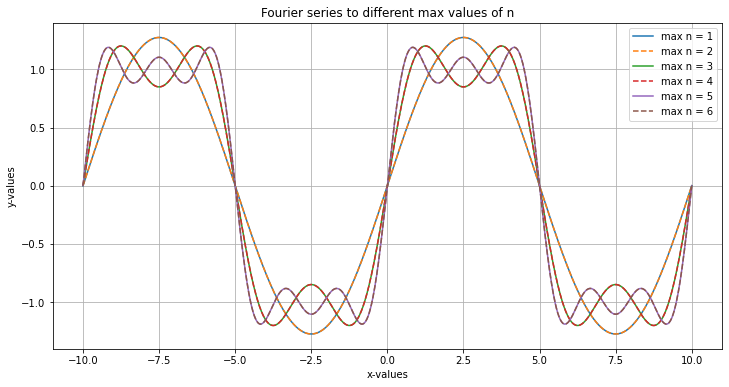

In [6]:
#plot graph and grid
plt.figure
plt.grid(True)
#plot title and axes labels
plt.title("Fourier series to different max values of n")
plt.xlabel("x-values")
plt.ylabel("y-values")
#plot even and odd values for n_max
plt.plot(x, fourier_sum(x,1), label = "max n = 1")
plt.plot(x, fourier_sum(x,2),"--" , label = "max n = 2")
plt.plot(x, fourier_sum(x,3), label = "max n = 3")
plt.plot(x, fourier_sum(x,4),"--" , label = "max n = 4")
plt.plot(x, fourier_sum(x,5), label = "max n = 5")
plt.plot(x, fourier_sum(x,6),"--" ,label = "max n = 6")
#plot legend
plt.legend(loc="best")

Plotting even and odd values for n_max show that the even values are equal to the odd value of n_max before it. This shows that the function does not have a weird definition that can cause a bug when even values for n_max are used.

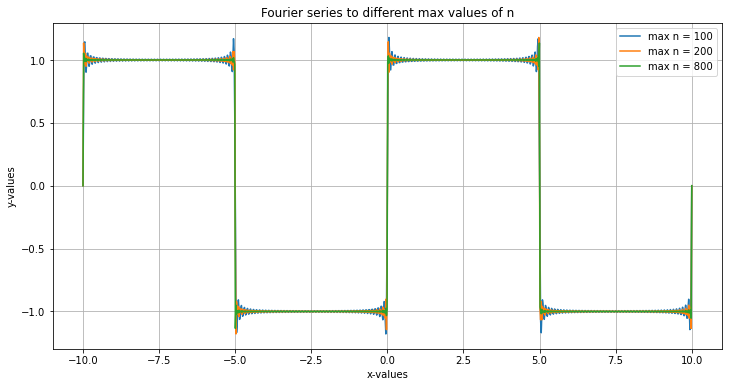

In [7]:
#plot graph and grid
plt.figure
plt.grid(True)
#plot title and axes labels
plt.title("Fourier series to different max values of n")
plt.xlabel("x-values")
plt.ylabel("y-values")
#plot fourier sum when n_max is very large
plt.plot(x, fourier_sum(x,100), label = "max n = 100")
plt.plot(x, fourier_sum(x,200), label = "max n = 200")
plt.plot(x, fourier_sum(x,800), label = "max n = 800")
#plot legend
plt.legend(loc = "best")

When the term value is very large, the fourier series is very close to the sqaure wave function, however, small oscillations are still visible at the peak of the square wave. These will never disappear unless there are an infinite number of terms, but the oscillations will get small as more terms are added. This is evident when comparing n=800 to n=100, for n=100 the approximation has much larger oscillations at the beginning or end of the flat peaks or troughs compared to n=800. However, for values greater than 100, the function is far more different compared to small n values as it more closely resembles the square wave.

## References:
[1] Dash L, Waugh B. *PHAS0007 Computing Unit 7 Task Introduction: Expanding a square wave as a Fourier series* [online] UCL: London; 2022 [Accessed 22 November 2022]. Available from https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305213